# ETL phase 2, Data Cleaning - Missing Data

In [7]:
#!pip install pandas
#!pip install os
#!pip install seaborn
import pandas as pd
import numpy as np
import os
import glob
import seaborn as sns

## Cleaning Missing Data

In [5]:
#set my_path
my_path = r"C:\MyDataFiles\Data_CCBIS_202107"

#print(my_path)


In [6]:
os.chdir(my_path)
for file in glob.glob("*.csv"):
    print(file)

CDR.csv
DimAgent.csv
DimCustomer.csv
DimGeography.csv
DimHandleType.csv
DimProduct.csv
DimProductGroup.csv
DimServiceType.csv
DimSeverifyType.csv


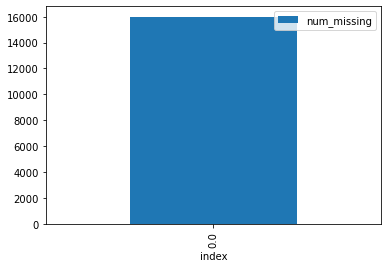

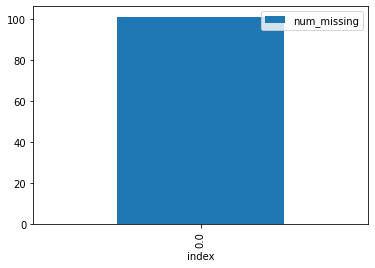

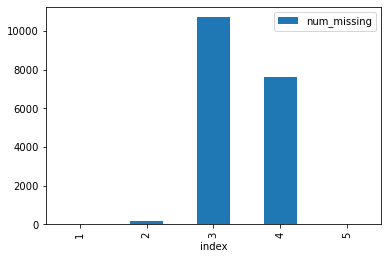

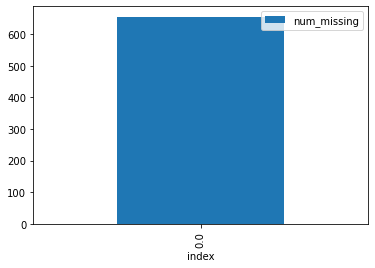

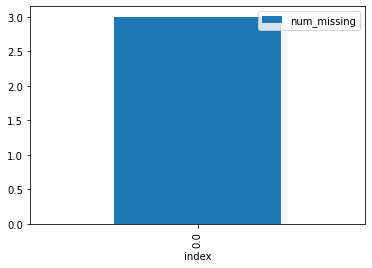

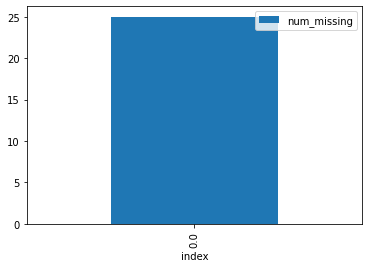

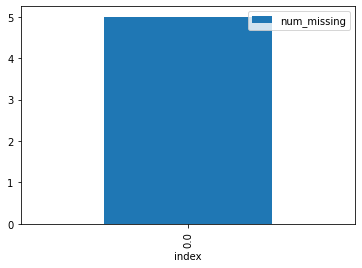

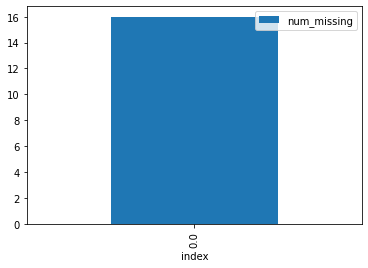

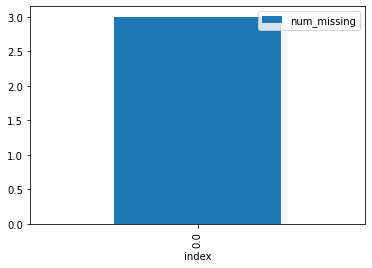

In [32]:
os.chdir(my_path)
for file in glob.glob("*.csv"):
    #print(file)

    # read the data
    df = pd.read_csv(file)

    # select numeric columns
    df_numeric = df.select_dtypes(include=[np.number])
    numeric_cols = df_numeric.columns.values
    #print(numeric_cols)

    # select non numeric columns
    df_non_numeric = df.select_dtypes(exclude=[np.number])
    non_numeric_cols = df_non_numeric.columns.values
    #print(non_numeric_cols)

    cols = df.columns # first 30 columns
    colours = ['#000099', '#ffff00'] # specify the colours - yellow is missing. blue is not missing.
    sns.heatmap(df[cols].isnull(), cmap=sns.color_palette(colours))

    # Missing Data Percentage List - % of missing.
    for col in df.columns:
        missing = df[col].isnull()
        num_missing = np.sum(missing)
        pct_missing = np.mean(missing)
        print(file + ' {} - {}%'.format(col, round(pct_missing*100)))

        if num_missing > 0:  
            #print('created missing indicator for: {}'.format(col))
            df['{}_ismissing'.format(col)] = missing

    # then based on the indicator, plot the histogram of missing values
    #ismissing_cols = [col for col in df.columns if 'missing' in col]
    #df['num_missing'] = df[ismissing_cols].sum(axis=1)

    #df['num_missing'].value_counts().reset_index().sort_values(by='index').plot.bar(x='index', y='num_missing')


## Cleaning Duplicate Data - one file demo

In [22]:
# set path and file
os.chdir(my_path)
file = my_path + "\CDR.csv"
print(file)

# get file
df = pd.read_csv(file)
print(df.shape)
# drop duplicate
df.drop_duplicates(keep="first", inplace=True)
# write to the csf if need
file = my_path + "\CDR1.csv"
df.to_csv(file, index=False) 
print(df.shape)

C:\MyDataFiles\Data_CCBIS_202107\CDR.csv
(16001, 18)
(16000, 18)
